In [247]:
import tweepy
import pandas as pd
import configparser
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [248]:
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

In [249]:
api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

In [250]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [251]:
#posts = tweepy.Cursor(api.user_timeline, screen_name="ArvindKejriwal", count = 200, tweet_mode="extended").items((300))

In [252]:
posts = tweepy.Cursor(api.search_tweets, q="#bitcoin", count = 200, lang ="en", tweet_mode="extended").items((100))

In [253]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [254]:
df

,Tweets
0,RT @Dennis_Porter_: BREAKING NEWS: Jack Dorsey...
1,@0xHerrCooles @coinbase @ianheinischmma @Shann...
2,RT @kloflin86: It's happening. #SHINJA #Shibno...
3,"RT @Jayecane: rt + post your cashapp , PayPal ..."
4,@0xHerrCooles @coinbase @ianheinischmma @Shann...
...,...
95,RT @Diditaihuttu: BITCOIN PROBLEM!! HOW TO SPE...
96,RT @anilsaidso: Looking at everything that's h...
97,"RT @WINK_USDT: @BinanceUS I'm Giving Out $10,0..."
98,Economic mismanagement and conflict will drive...


In [255]:
df['mentions'] = df['Tweets'].str.extract('(@[A-Za-z0–9]+)', expand=False).str.strip()
df['links'] = df['Tweets'].str.extract('(https?:\/\/\S+)', expand=False).str.strip()
df['retweets'] = df['Tweets'].str.extract('(RT[\s@[A-Za-z0–9]+)', expand=False).str.strip()

In [256]:
df

,Tweets,mentions,links,retweets
0,RT @Dennis_Porter_: BREAKING NEWS: Jack Dorsey...,@Dennis,NaN,RT @Dennis
1,@0xHerrCooles @coinbase @ianheinischmma @Shann...,@0xHerrCooles,https://t.co/locMMJNiQO,NaN
2,RT @kloflin86: It's happening. #SHINJA #Shibno...,@kloflin,NaN,RT @kloflin
3,"RT @Jayecane: rt + post your cashapp , PayPal ...",@Jayecane,NaN,RT @Jayecane
4,@0xHerrCooles @coinbase @ianheinischmma @Shann...,@0xHerrCooles,NaN,NaN
...,...,...,...,...
95,RT @Diditaihuttu: BITCOIN PROBLEM!! HOW TO SPE...,@Diditaihuttu,https://t.co/3P6t0OUQ0H,RT @Diditaihuttu
96,RT @anilsaidso: Looking at everything that's h...,@anilsaidso,NaN,RT @anilsaidso
97,"RT @WINK_USDT: @BinanceUS I'm Giving Out $10,0...",@WINK,NaN,RT @WINK
98,Economic mismanagement and conflict will drive...,@Tradeosiann,NaN,NaN


In [257]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [258]:
df

,Tweets,mentions,links,retweets
0,RT @Dennis_Porter_: BREAKING NEWS: Jack Dorsey...,@Dennis,NaN,RT @Dennis
1,@0xHerrCooles @coinbase @ianheinischmma @Shann...,@0xHerrCooles,https://t.co/locMMJNiQO,NaN
2,RT @kloflin86: It's happening. #SHINJA #Shibno...,@kloflin,NaN,RT @kloflin
3,"RT @Jayecane: rt + post your cashapp , PayPal ...",@Jayecane,NaN,RT @Jayecane
4,@0xHerrCooles @coinbase @ianheinischmma @Shann...,@0xHerrCooles,NaN,NaN
...,...,...,...,...
95,RT @Diditaihuttu: BITCOIN PROBLEM!! HOW TO SPE...,@Diditaihuttu,https://t.co/3P6t0OUQ0H,RT @Diditaihuttu
96,RT @anilsaidso: Looking at everything that's h...,@anilsaidso,NaN,RT @anilsaidso
97,"RT @WINK_USDT: @BinanceUS I'm Giving Out $10,0...",@WINK,NaN,RT @WINK
98,Economic mismanagement and conflict will drive...,@Tradeosiann,NaN,NaN


In [259]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub("\n","",text) 
    text = re.sub(":","",text) 
    text = re.sub("_","",text) 
    text = emoji_pattern.sub(r'', text)
    return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df['retweets'] = df['retweets'].str.replace(r"(RT )", "")
discard = ["CNFTGiveaway", "IVEAWAYPrizes", "Giveaway", "Airdrop"]
df = df[~df["Tweets"].str.contains('|'.join(discard))]

<ipython-input-259-bed636f836b2>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df['retweets'] = df['retweets'].str.replace(r"(RT )", "")


In [261]:
df

,Tweets,mentions,links,retweets
0,Porter BREAKING NEWS Jack Dorsey supports Pro-...,@Dennis,NaN,@Dennis
1,4Winz You say you’re willing to gain w...,@0xHerrCooles,https://t.co/locMMJNiQO,NaN
2,86 It's happening. SHINJA Shibnobi Crypto cryp...,@kloflin,NaN,@kloflin
3,"rt + post your cashapp , PayPal , Bitcoin , s...",@Jayecane,NaN,@Jayecane
4,4Winz When BlueSparrow take a handful ...,@0xHerrCooles,NaN,NaN
...,...,...,...,...
95,BITCOIN PROBLEM!! HOW TO SPEND 50K WITHOUT….?...,@Diditaihuttu,https://t.co/3P6t0OUQ0H,@Diditaihuttu
96,Looking at everything that's happening around...,@anilsaidso,NaN,@anilsaidso
97,"USDT I'm Giving Out $10,000 worth of BNB and...",@WINK,NaN,@WINK
98,Economic mismanagement and conflict will drive...,@Tradeosiann,NaN,NaN


In [262]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

<ipython-input-262-d444dd8f48c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
<ipython-input-262-d444dd8f48c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Tweets'].apply(getPolarity)


,Tweets,mentions,links,retweets,Subjectivity,Polarity
0,Porter BREAKING NEWS Jack Dorsey supports Pro-...,@Dennis,NaN,@Dennis,0.500000,0.500000
1,4Winz You say you’re willing to gain w...,@0xHerrCooles,https://t.co/locMMJNiQO,NaN,0.750000,0.250000
2,86 It's happening. SHINJA Shibnobi Crypto cryp...,@kloflin,NaN,@kloflin,0.000000,0.000000
3,"rt + post your cashapp , PayPal , Bitcoin , s...",@Jayecane,NaN,@Jayecane,0.000000,0.000000
4,4Winz When BlueSparrow take a handful ...,@0xHerrCooles,NaN,NaN,0.550000,0.575000
...,...,...,...,...,...,...
95,BITCOIN PROBLEM!! HOW TO SPEND 50K WITHOUT….?...,@Diditaihuttu,https://t.co/3P6t0OUQ0H,@Diditaihuttu,0.000000,0.000000
96,Looking at everything that's happening around...,@anilsaidso,NaN,@anilsaidso,0.767857,0.142857
97,"USDT I'm Giving Out $10,000 worth of BNB and...",@WINK,NaN,@WINK,0.100000,0.300000
98,Economic mismanagement and conflict will drive...,@Tradeosiann,NaN,NaN,0.381250,0.100000


In [263]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

<ipython-input-263-5984e99df0d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Polarity'].apply(getAnalysis)


,Tweets,mentions,links,retweets,Subjectivity,Polarity,Analysis
0,Porter BREAKING NEWS Jack Dorsey supports Pro-...,@Dennis,NaN,@Dennis,0.500000,0.500000,Positive
1,4Winz You say you’re willing to gain w...,@0xHerrCooles,https://t.co/locMMJNiQO,NaN,0.750000,0.250000,Positive
2,86 It's happening. SHINJA Shibnobi Crypto cryp...,@kloflin,NaN,@kloflin,0.000000,0.000000,Neutral
3,"rt + post your cashapp , PayPal , Bitcoin , s...",@Jayecane,NaN,@Jayecane,0.000000,0.000000,Neutral
4,4Winz When BlueSparrow take a handful ...,@0xHerrCooles,NaN,NaN,0.550000,0.575000,Positive
...,...,...,...,...,...,...,...
95,BITCOIN PROBLEM!! HOW TO SPEND 50K WITHOUT….?...,@Diditaihuttu,https://t.co/3P6t0OUQ0H,@Diditaihuttu,0.000000,0.000000,Neutral
96,Looking at everything that's happening around...,@anilsaidso,NaN,@anilsaidso,0.767857,0.142857,Positive
97,"USDT I'm Giving Out $10,000 worth of BNB and...",@WINK,NaN,@WINK,0.100000,0.300000,Positive
98,Economic mismanagement and conflict will drive...,@Tradeosiann,NaN,NaN,0.381250,0.100000,Positive


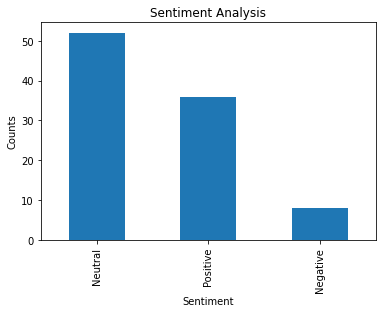

In [264]:


# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

